# CK case study

### Notebook helper function for pretty output

In [1]:
from IPython.display import Markdown, display


def print_md(markdown_printable):
    """Pretty render Markdown."""
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset, load_model, load_parameters
from glotaran.project.scheme import Scheme

## Global Analysis

### Read data

In [4]:
dataset = load_dataset("CKtr4U.ascii")
dataset

<xarray.Dataset>
Dimensions:                      (left_singular_value_index: 50, right_singular_value_index: 50, singular_value_index: 50, spectral: 50, time: 1023)
Coordinates:
  * time                         (time) float64 0.0 2.123 ... 2.015e+03
  * spectral                     (spectral) float64 613.6 617.2 ... 784.9 789.2
Dimensions without coordinates: left_singular_value_index, right_singular_value_index, singular_value_index
Data variables:
    data                         (time, spectral) float64 0.0 0.5 ... 2.357 2.95
    data_left_singular_vectors   (time, left_singular_value_index) float64 -0...
    data_singular_values         (singular_value_index) float64 1.772e+04 ......
    data_right_singular_vectors  (right_singular_value_index, spectral) float64 ...

### Load model and parameters

In [5]:
CK_global_model = load_model("models/CK-global-model.yml")
CK_global_parameters = load_parameters("models/CK-global-parameters.yml")
print_md(CK_global_model.validate(parameters=CK_global_parameters))

Your model is valid.

In [6]:
print_md(CK_global_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2']
  * *Parameters*: [input.1, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s2', 's1')*: kinetic.1
    * *('s2', 's2')*: kinetic.2
  

## Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center]
  * *Width*: [irf.width]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.backsweep
  * *Dispersion Center*: irf.dispc
  * *Center Dispersion*: [irf.disp1, irf.disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']



### Create scheme and optimize it

In [7]:
CK_global_scheme = Scheme(CK_global_model, CK_global_parameters, {"dataset1": dataset}, non_negative_least_squares=True)
CK_global_result = optimize(CK_global_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.1083e+06                                    2.09e+10    
       1              2         2.5150e+05      4.86e+06       9.93e-01       4.30e+09    
       2              3         1.3603e+05      1.15e+05       2.66e+00       3.49e+08    
       3              4         1.2929e+05      6.74e+03       7.82e-01       6.33e+06    
       4              5         1.2852e+05      7.66e+02       6.91e-02       5.25e+06    
       5              6         1.2844e+05      8.67e+01       4.65e-02       2.19e+06    
       6              7         1.2843e+05      7.48e+00       1.74e-02       7.26e+05    
       7              8         1.2843e+05      5.76e-01       5.12e-03       2.10e+05    
       8              9         1.2843e+05      4.27e-02       1.42e-03       5.77e+04    
       9             10         1.2843e+05      3.14e-03       3.88e-04       1.57e+04    

In [8]:
CK_global_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 2, component: 2, from_species: 2, left_singular_value_index: 50, right_singular_value_index: 50, singular_value_index: 50, species: 2, spectral: 50, time: 1023, to_species: 2)
Coordinates:
  * time                                      (time) float64 0.0 ... 2.015e+03
  * spectral                                  (spectral) float64 613.6 ... 789.2
  * clp_label                                 (clp_label) <U2 's1' 's2'
  * species                                   (species) <U2 's1' 's2'
    rate                                      (component) float64 -0.02392 -0...
    lifetime                                  (component) float64 -41.8 -1.68...
  * to_species                                (to_species) <U2 's1' 's2'
  * from_species                              (from_species) <U2 's1' 's2'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/25)
    data                                      (time, spectral) float64 0.0 .....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (spectral, time, clp_label) float64 ...
    clp                                       (spectral, clp_label) float64 1...
    ...                                        ...
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 318.3
    irf_width                                 float64 11.1
    irf                                       (time) float64 6.299e-175 ... 0.0
    center_dispersion_1                       (spectral) float64 314.4 ... 318.2
Attributes:
    root_mean_square_error:           2.240896495920901
    weighted_root_mean_square_error:  2.240896495920901

### Result plots

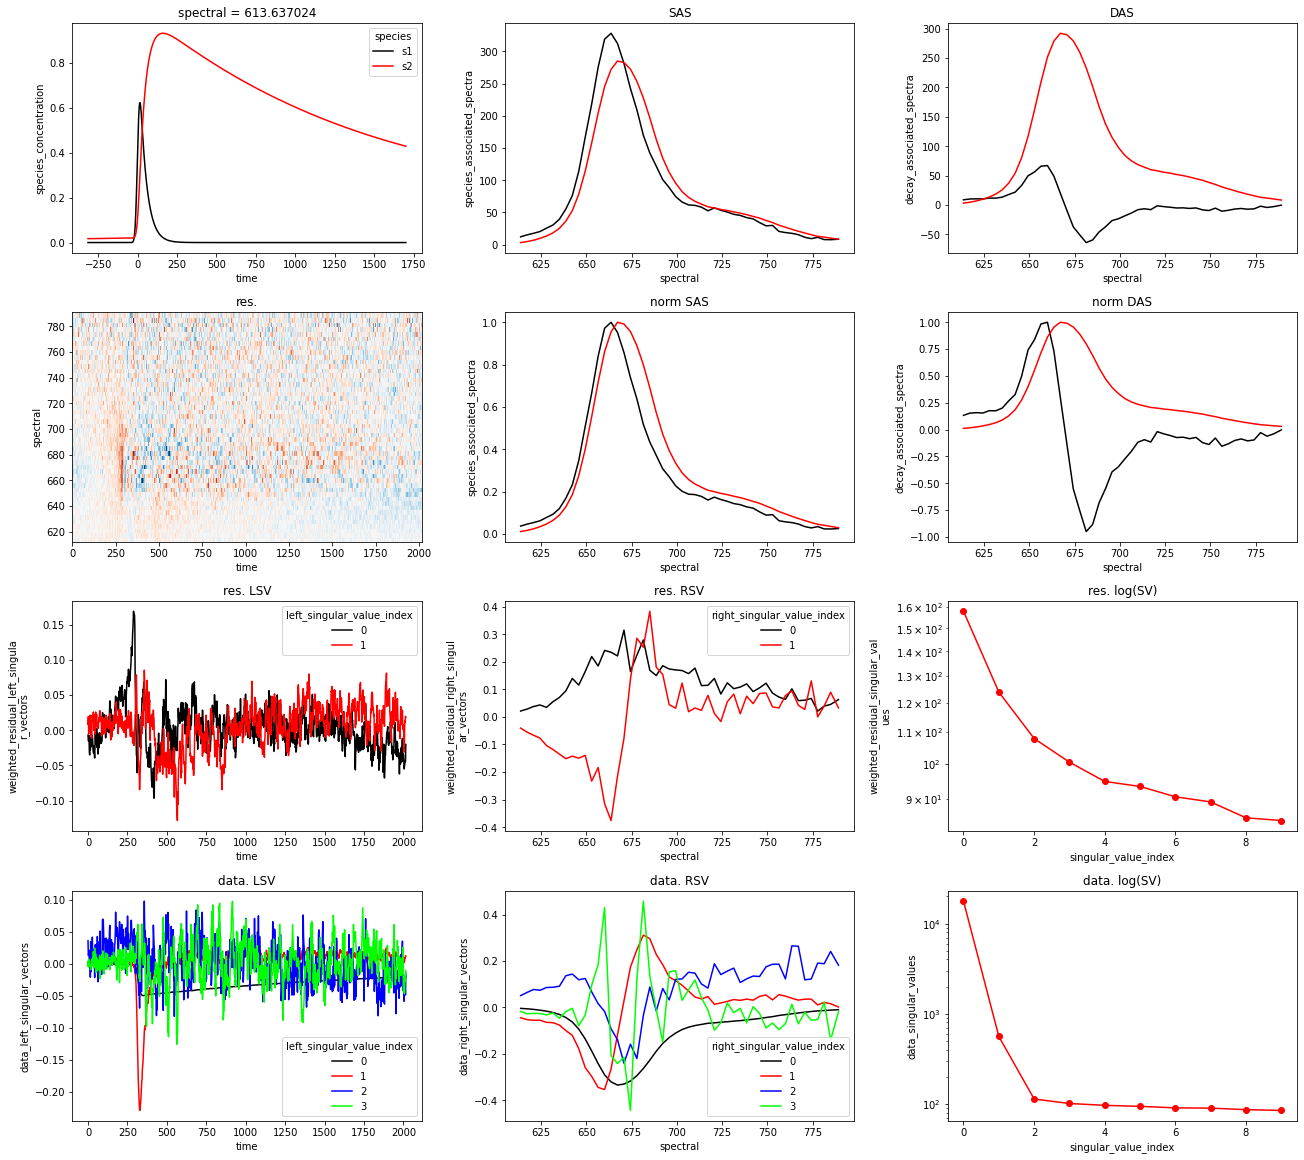

In [9]:
plot_overview(CK_global_result.data["dataset1"], linlog=False);

In [10]:
print_md(CK_global_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |    _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|------------|---------|---------|----------|------------------|----------|
    | center    |   318.308  |  0.0135225 |    -inf |     inf | True     | False            | None     |
    | width     |    11.1015 |  0.0165232 |    -inf |     inf | True     | False            | None     |
    | dispc     |   692      |  0         |    -inf |     inf | False    | False            | None     |
    | disp1     |     2.71   |  0         |    -inf |     inf | False    | False            | None     |
    | disp2     |    -2.85   |  0         |    -inf |     inf | False    | False            | None     |
    | backsweep | 13200      |  0         |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-------------|-------------|---------|---------|----------|------------------|----------|
    |         1 | 0.0239233   | 9.54935e-05 |    -inf |     inf | True     | False            | None     |
    |         2 | 0.000594344 | 1.19451e-07 |    -inf |     inf | True     | False            | None     |



## Target Analysis

### Load model and parameters

In [11]:
CK_target_model = load_model("models/CK-target-model.yml")
CK_target_parameters = load_parameters("models/CK-target-parameters.yml")
print_md(CK_target_model.validate(parameters=CK_target_parameters))

Your model is valid.

In [12]:
compartments = CK_target_model.initial_concentration["input1"].compartments
print_md(CK_target_model.k_matrix["km1"].matrix_as_markdown(compartments).replace("0.0000e+00",""))

| compartment | s1 | s2 | s3 | s4
|---|---|---|---|---
| s1 | kinetic.4 | kinetic.1 | kinetic.1 | |
| s2 | kinetic.1 | kinetic.4 | kinetic.2 | |
| s3 | kinetic.1_1 | kinetic.2_1 | kinetic.4 | kinetic.3_2|
| s4 |  |  | kinetic.3 | kinetic.4|


In [13]:
print_md(CK_target_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4']
  * *Parameters*: [input.1, input.1, input.3, input.4]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.4
    * *('s1', 's2')*: kinetic.1
    * *('s1', 's3')*: kinetic.1
    * *('s2', 's1')*: kinetic.1
    * *('s2', 's2')*: kinetic.4
    * *('s2', 's3')*: kinetic.2
    * *('s3', 's1')*: kinetic.1_1
    * *('s3', 's2')*: kinetic.2_1
    * *('s3', 's3')*: kinetic.4
    * *('s3', 's4')*: kinetic.3_2
    * *('s4', 's3')*: kinetic.3
    * *('s4', 's4')*: kinetic.4
  

## Irf

* **irf1** (spectral-multi-gaussian):
  * *Label*: irf1
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf.center]
  * *Width*: [irf.width]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf.backsweep
  * *Dispersion Center*: irf.dispc
  * *Center Dispersion*: [irf.disp1, irf.disp2]
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']

## Spectral Relations

* 
  * *Compartment*: s1
  * *Target*: s2
  * *Parameter*: rel.r1
  * *Interval*: [[0, 1000]]
* 
  * *Compartment*: s1
  * *Target*: s3
  * *Parameter*: rel.r1
  * *Interval*: [[0, 1000]]



### Create scheme and optimize it

In [14]:
CK_target_scheme = Scheme(CK_target_model, CK_target_parameters, {"dataset1": dataset}, non_negative_least_squares=True)
CK_target_result = optimize(CK_target_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4120e+05                                    6.31e+08    
       1              2         1.3235e+05      8.85e+03       1.98e+00       4.22e+07    
       2              3         1.2984e+05      2.50e+03       1.02e-01       8.84e+06    
       3              4         1.2984e+05      1.85e+00       5.89e-02       3.03e+04    
       4              6         1.2983e+05      5.69e+00       3.42e-03       3.85e+05    
       5              8         1.2983e+05      1.22e+00       8.56e-04       5.36e+04    
       6             10         1.2983e+05      4.71e-02       2.14e-04       1.36e+04    
       7             11         1.2983e+05      4.75e-03       2.14e-04       1.54e+03    
       8             12         1.2983e+05      8.76e-03       4.28e-04       2.39e+03    
       9             13         1.2983e+05      1.41e-02       8.56e-04       2.17e+03    

In [15]:
CK_target_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 4, component: 4, from_species: 4, left_singular_value_index: 50, right_singular_value_index: 50, singular_value_index: 50, species: 4, spectral: 50, time: 1023, to_species: 4)
Coordinates:
  * time                                      (time) float64 0.0 ... 2.015e+03
  * spectral                                  (spectral) float64 613.6 ... 789.2
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's4'
  * species                                   (species) <U2 's1' 's2' 's3' 's4'
    rate                                      (component) float64 -0.3616 ......
    lifetime                                  (component) float64 -2.765 ... ...
  * to_species                                (to_species) <U2 's1' ... 's4'
  * from_species                              (from_species) <U2 's1' ... 's4'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/25)
    data                                      (time, spectral) float64 0.0 .....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (spectral, time, clp_label) float64 ...
    clp                                       (spectral, clp_label) float64 6...
    ...                                        ...
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 318.2
    irf_width                                 float64 10.99
    irf                                       (time) float64 2.712e-178 ... 0.0
    center_dispersion_1                       (spectral) float64 314.4 ... 318.2
Attributes:
    root_mean_square_error:           2.253119787194881
    weighted_root_mean_square_error:  2.253119787194881

### Result plots

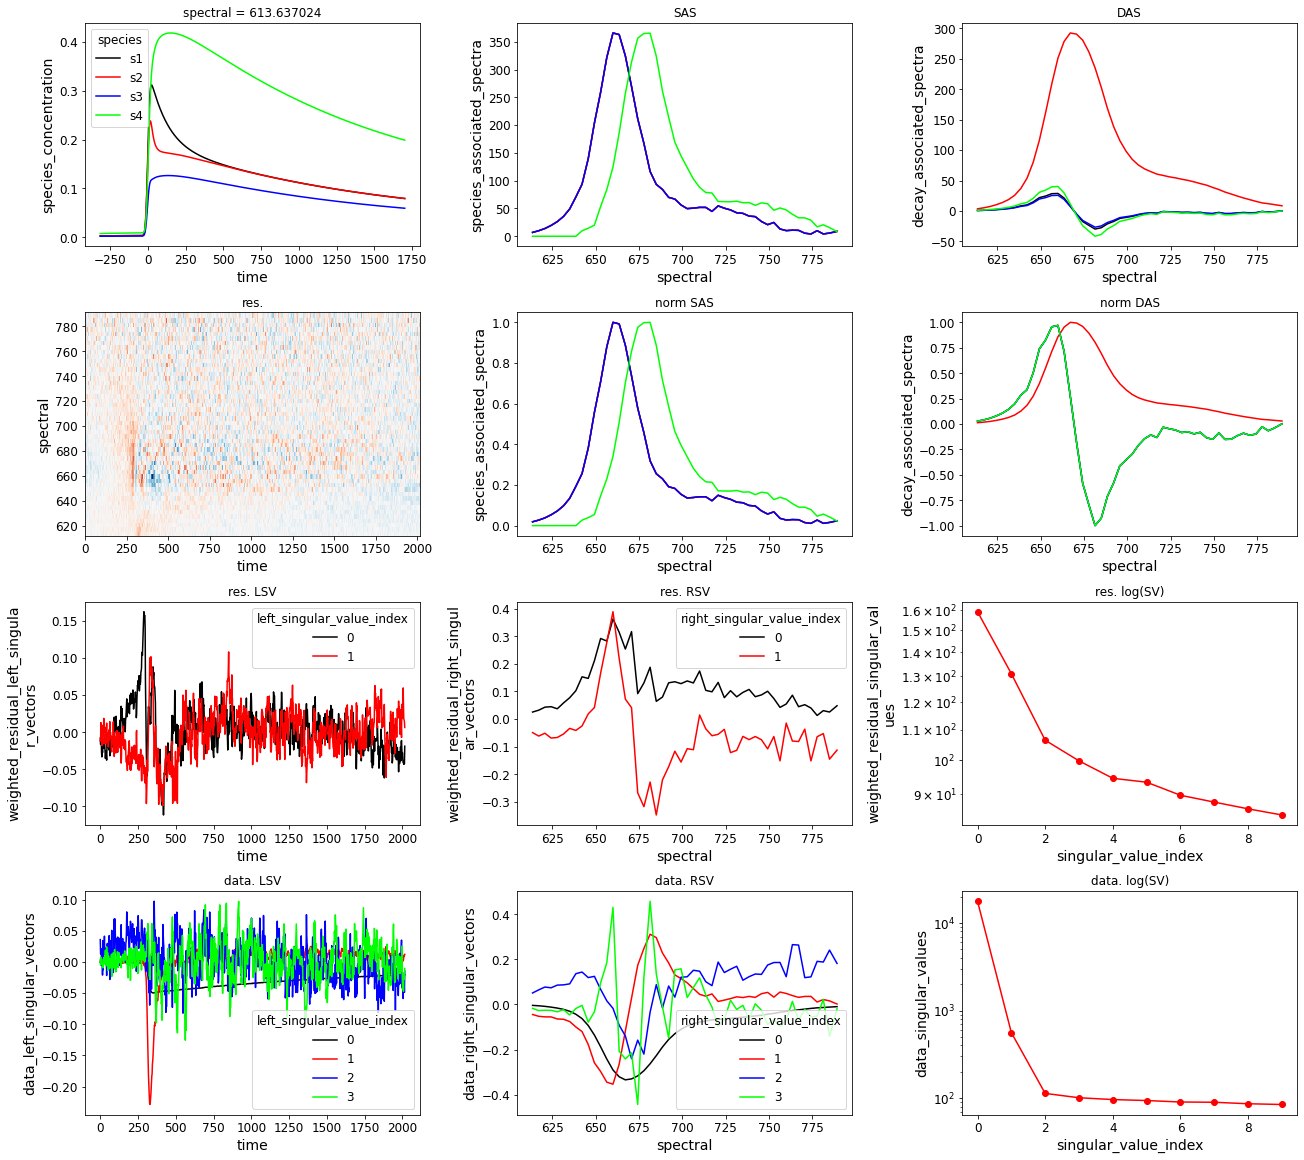

In [16]:
plot_overview(CK_target_result.data["dataset1"], linlog=False);

In [17]:
print_md(CK_target_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 | 0.333333  |          0 |    -inf |     inf | False    | False            | None     |
    |         3 | 0.25      |          0 |    -inf |     inf | False    | False            | None     |
    |         4 | 0.0833333 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |    _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|------------|---------|---------|----------|------------------|----------|
    | center    |   318.232  |  0.0139383 |    -inf |     inf | True     | False            | None     |
    | width     |    10.9931 |  0.0162399 |    -inf |     inf | True     | False            | None     |
    | dispc     |   692      |  0         |    -inf |     inf | False    | False            | None     |
    | disp1     |     2.71   |  0         |    -inf |     inf | False    | False            | None     |
    | disp2     |    -2.85   |  0         |    -inf |     inf | False    | False            | None     |
    | backsweep | 13200      |  0         |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    |   _Label_ |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_                  |
    |-----------|-------------|-------------|---------|---------|----------|------------------|-------------------------|
    |         1 | 0.004       | 0           |    -inf |     inf | False    | False            | None                    |
    |         2 | 0.058387    | 0.00102697  |    -inf |     inf | True     | False            | None                    |
    |         3 | 0.234       | 0           |    -inf |     inf | False    | False            | None                    |
    |         4 | 0.000595663 | 1.33317e-07 |    -inf |     inf | True     | False            | None                    |
    |       1_1 | 0.003       | 0           |    -inf |     inf | False    | False            | $kinetic.1 * $scaling.1 |
    |       2_1 | 0.0437902   | 0           |    -inf |     inf | False    | False            | $kinetic.2 * $scaling.1 |
    |       3_2 | 0.0702      | 0           |    -inf |     inf | False    | False            | $kinetic.3 * $scaling.2 |

  * __rel__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | r1        |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __scaling__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |      0.75 |          0 |    -inf |     inf | False    | False            | None     |
    |         2 |      0.3  |          0 |    -inf |     inf | False    | False            | None     |

